In [ ]:
pip install pandas

In [1]:
import pandas as pd

# Load the dataset
new_dataset_path = 'NCRB-2021_Table_1C.2.csv'
new_data = pd.read_csv(new_dataset_path)

# Remove rows where 'State/UT' contains 'Total State', 'Total UT', or 'Total All India'
filtered_data = new_data[~new_data['State/UT Col. (2)'].str.contains('Total State|Total UT|Total All India', case=False, na=False)]

# Save the filtered data to a new CSV file
filtered_csv_path = 'NCRB_2021_filtered.csv'
filtered_data.to_csv(filtered_csv_path, index=False)

print(f"Filtered data saved to {filtered_csv_path}")

Filtered data saved to NCRB_2021_filtered.csv


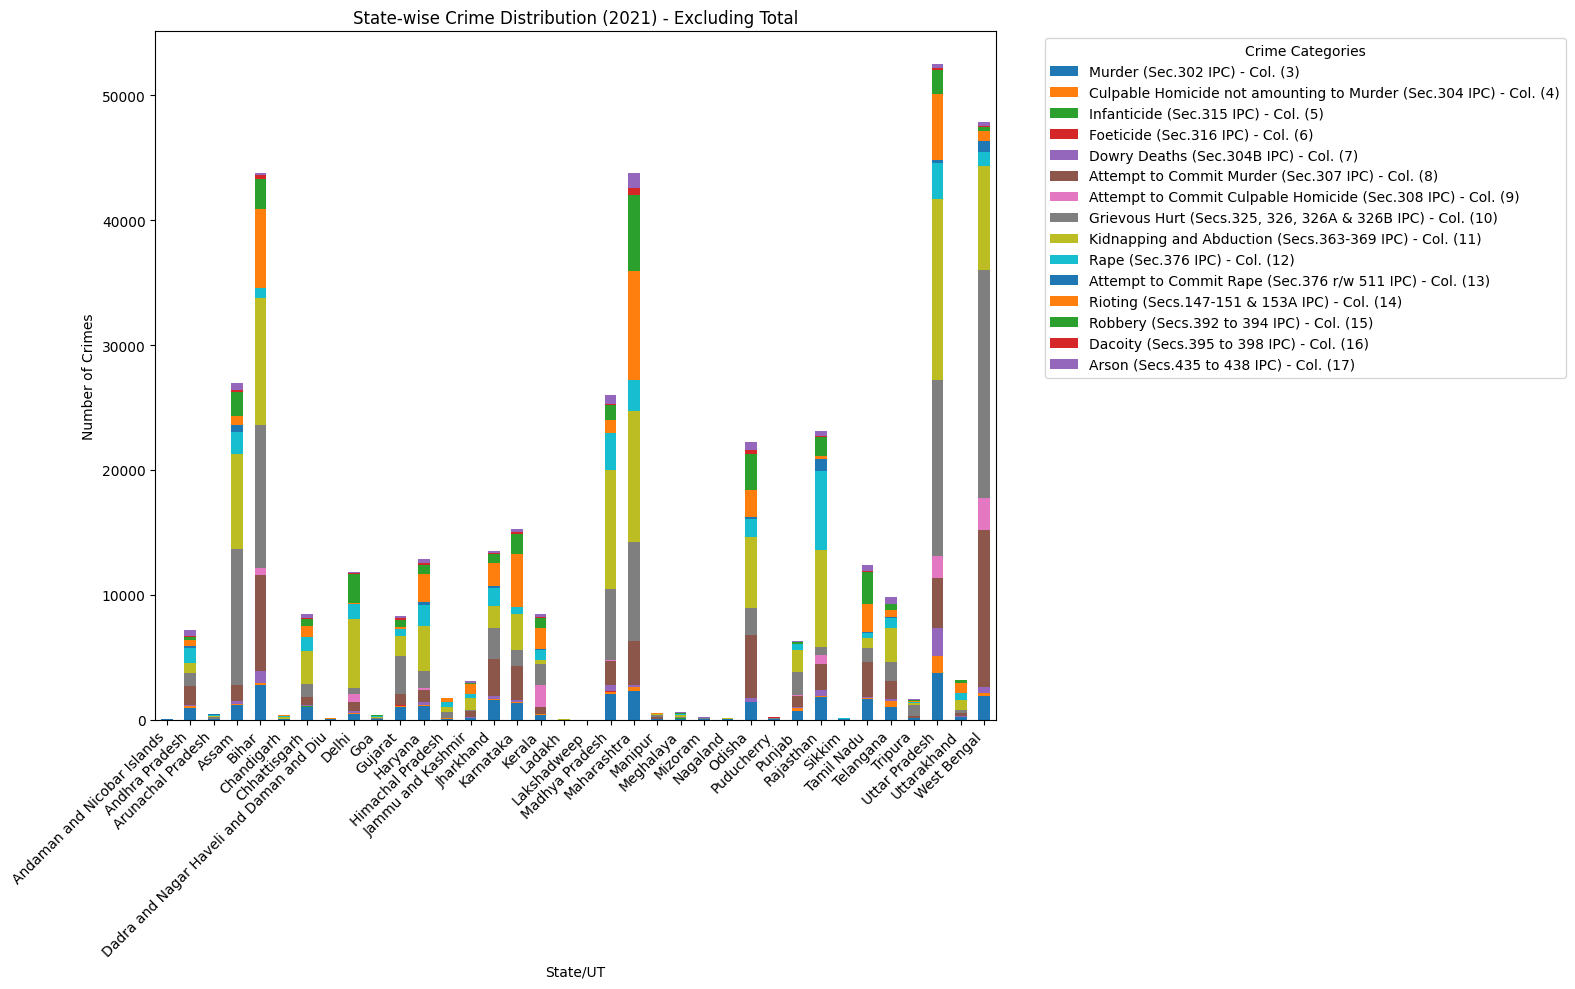

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data_filtered = pd.read_csv('NCRB_2021_filtered.csv')

# Remove unnecessary columns like Sl. No.
data_filtered = data_filtered.drop(columns=['Sl. No. Col. (1)'])

# Define broader categories for crimes, excluding the last 'Total' column
crime_categories_without_total = data_filtered.columns[1:-1]

# State-wise crime distribution excluding the total column
state_crime_counts_without_total = data_filtered.groupby('State/UT Col. (2)')[crime_categories_without_total].sum()

# Plotting state-wise crime distribution without the total column
state_crime_counts_without_total.plot(kind='bar', figsize=(16, 10), stacked=True)
plt.xlabel('State/UT')
plt.ylabel('Number of Crimes')
plt.title('State-wise Crime Distribution (2021) - Excluding Total')
plt.legend(title='Crime Categories', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [6]:
import folium
import pandas as pd

# Load GeoJSON file with state boundaries
india_states_geojson = 'map.geojson'

# Read the filtered dataset
statewise_data = pd.read_csv('NCRB_2021_filtered.csv')

# Rename columns for ease of use
statewise_data.rename(columns={'State/UT Col. (2)': 'State', 'Total Violent Crimes (Cols.3 to 17) - Col. (18)': 'Total Crimes'}, inplace=True)

# Initialize a Folium map centered around India
map = folium.Map(location=[20.5937, 78.9629], zoom_start=4)

# Add choropleth layer to the map
folium.Choropleth(
    geo_data=india_states_geojson,
    name='choropleth',
    data=statewise_data,
    columns=['State', 'Total Crimes'],
    key_on='feature.properties.st_nm',  # Use 'st_nm' for the key matching state names
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Total Crimes (2021)'
).add_to(map)

# Display the map
map.save('choropleth_map_2021.html')


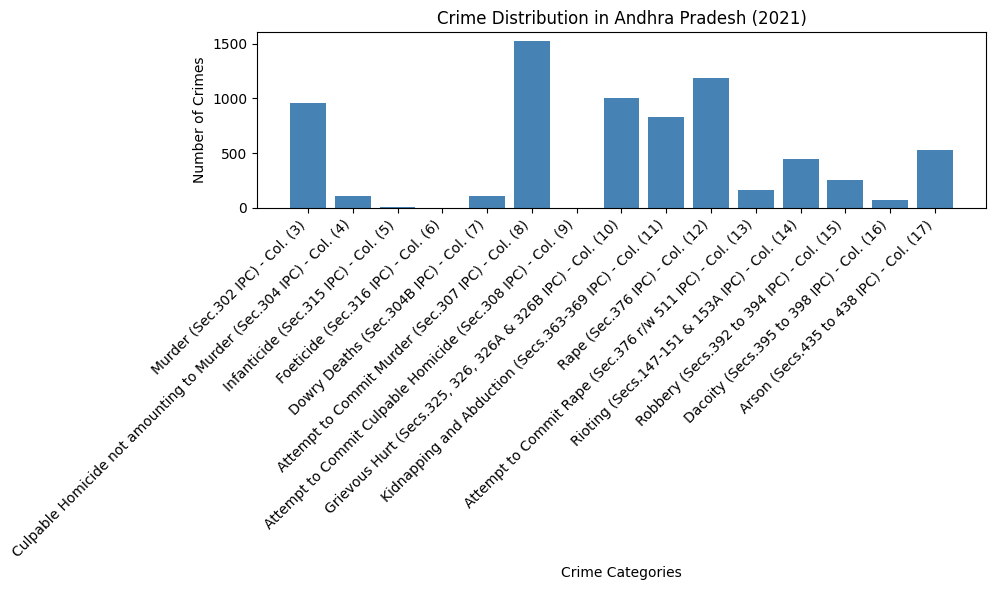

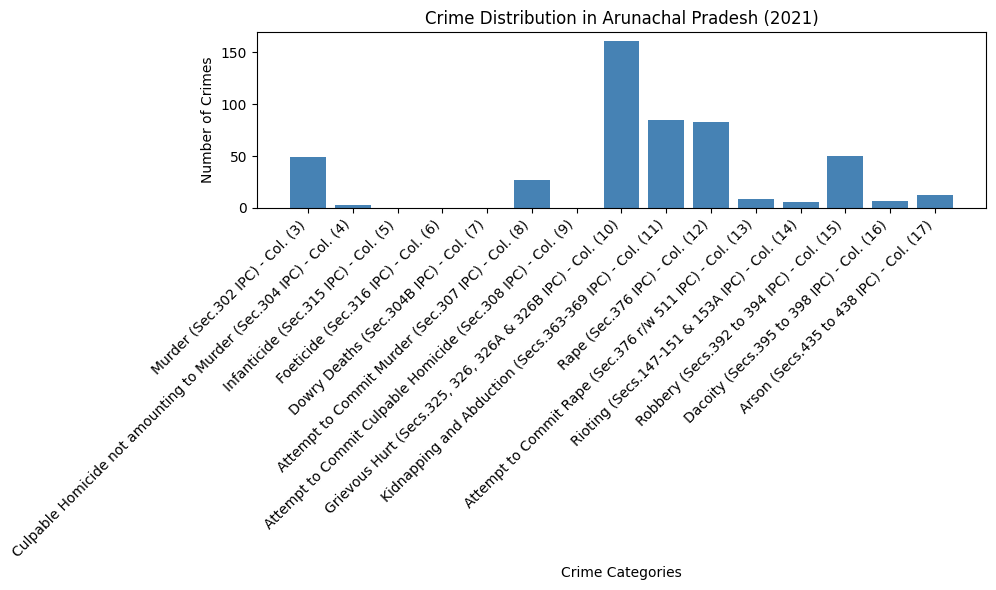

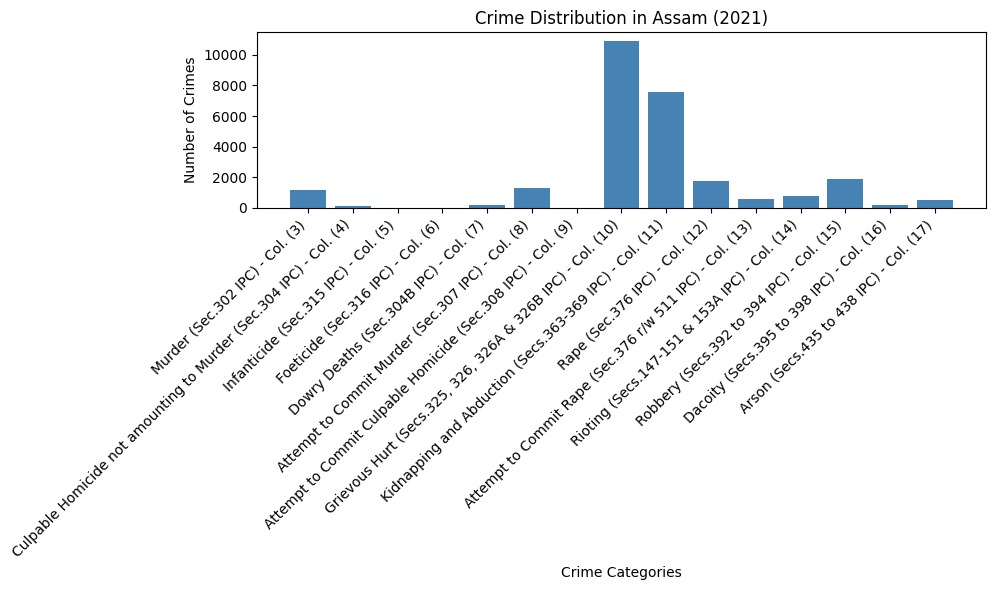

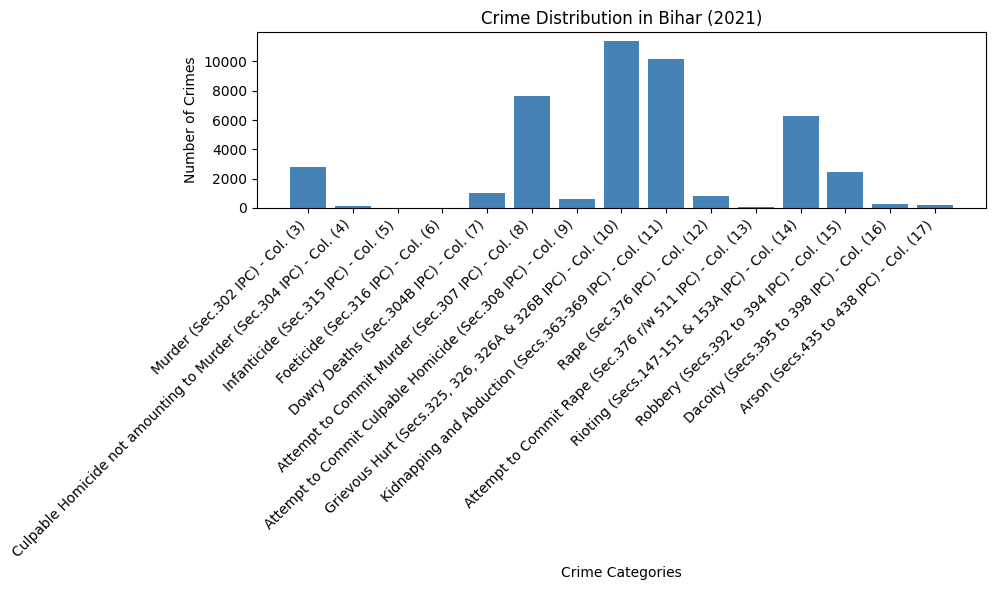

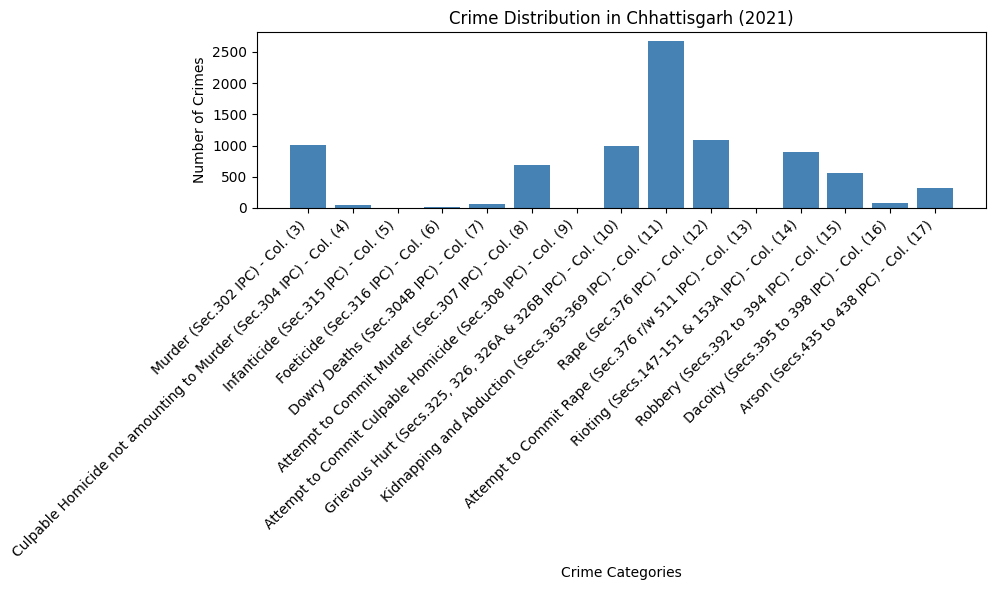

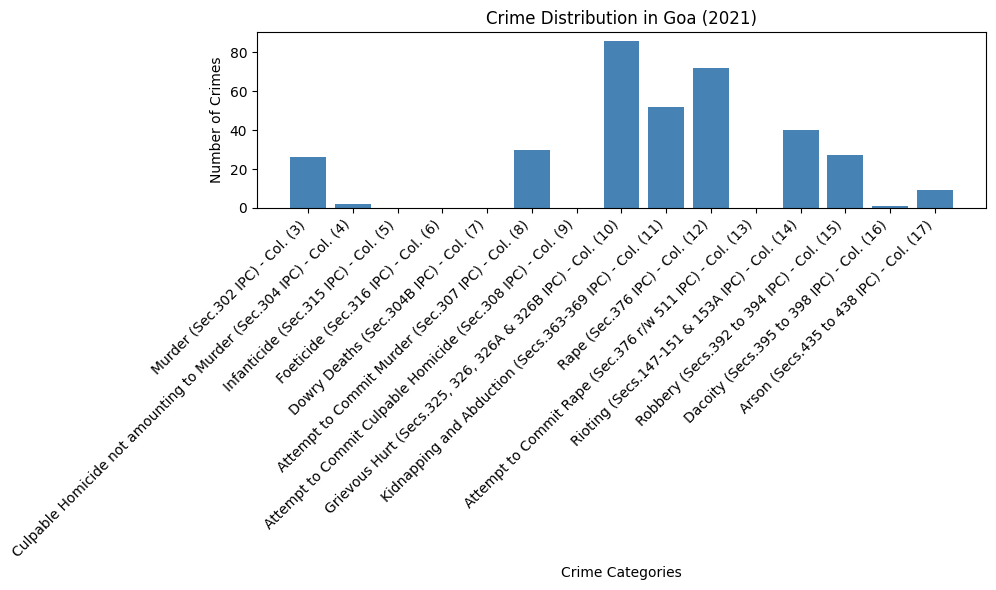

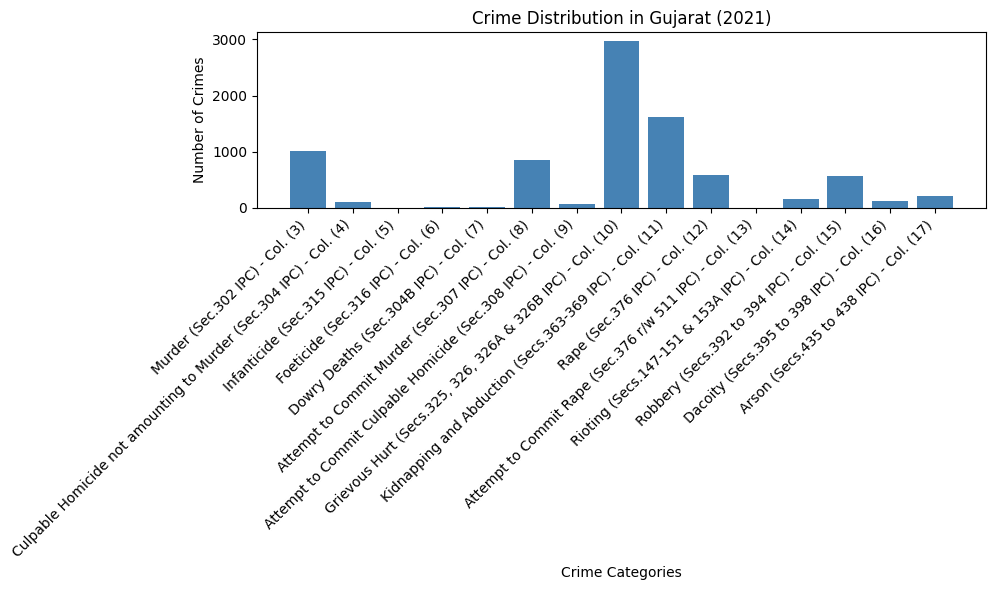

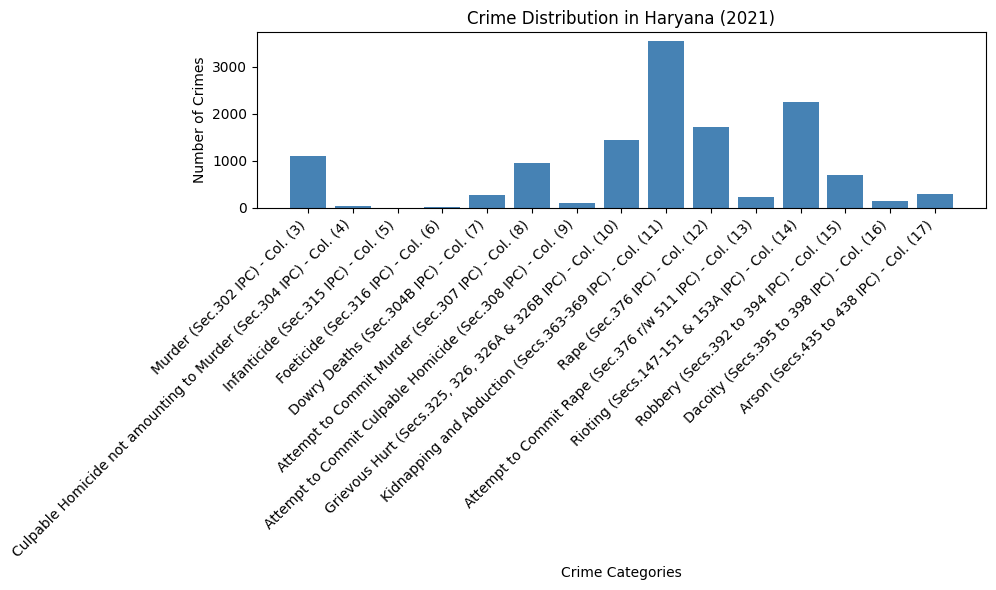

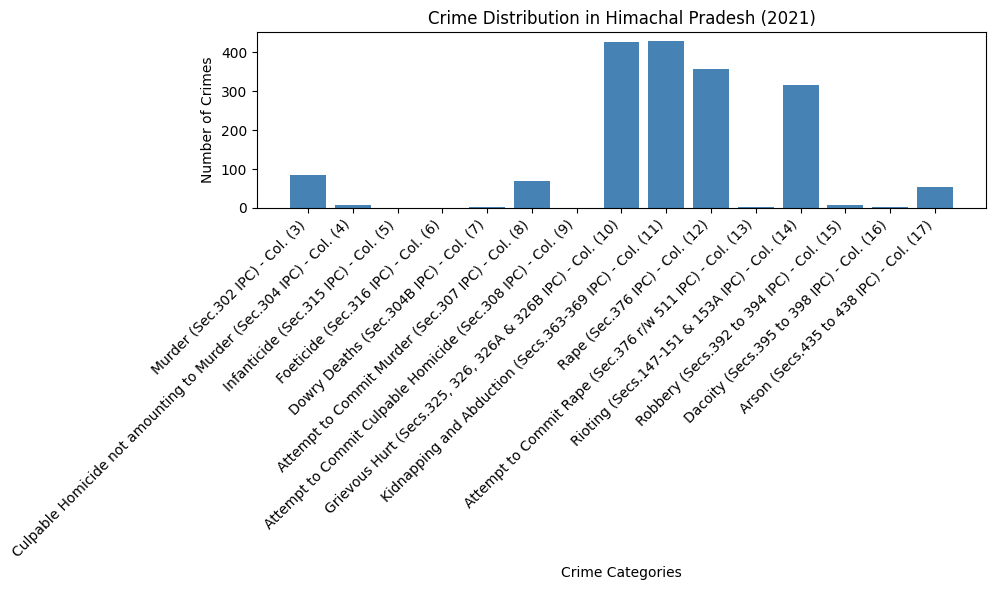

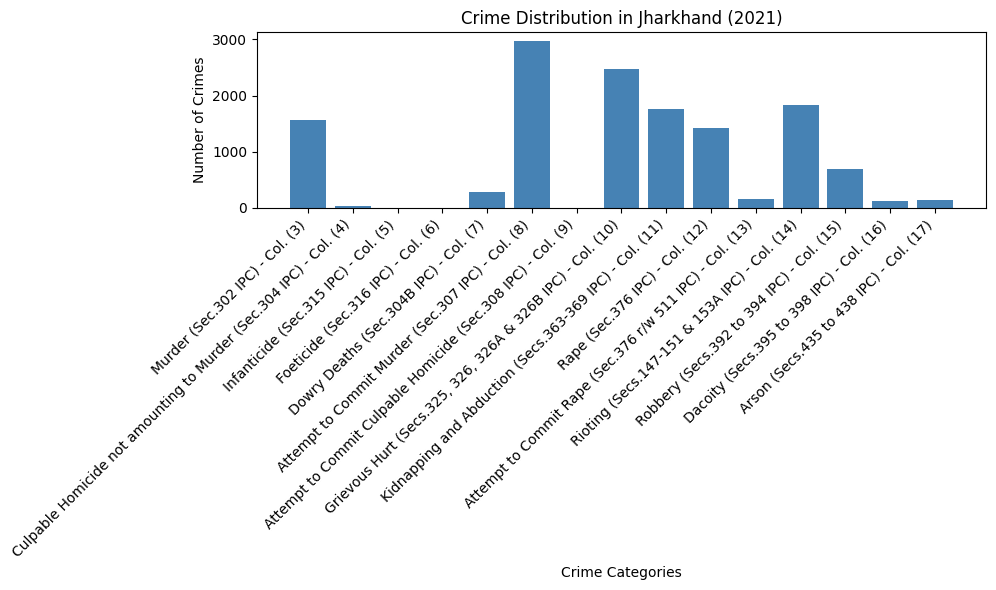

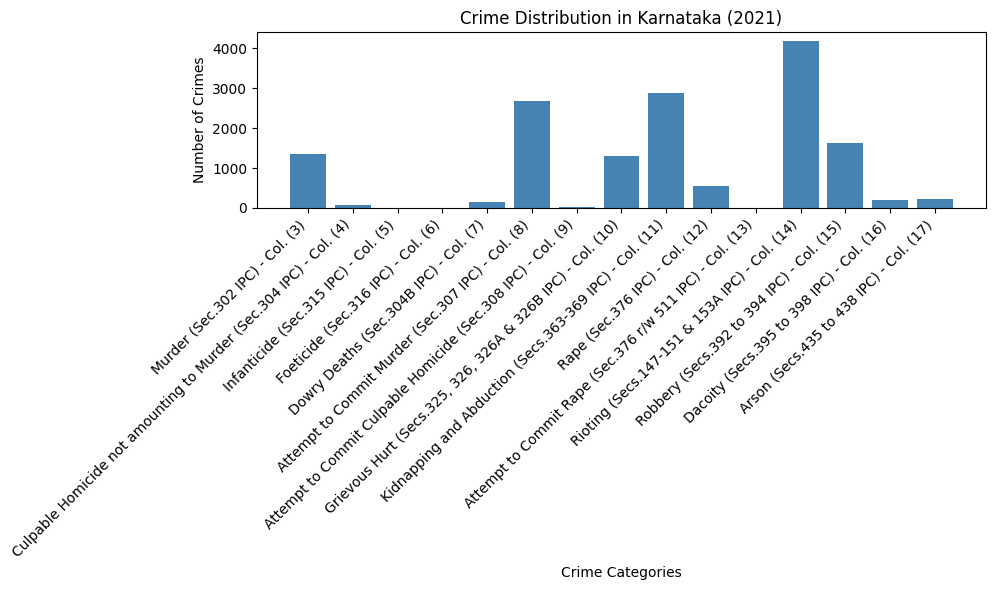

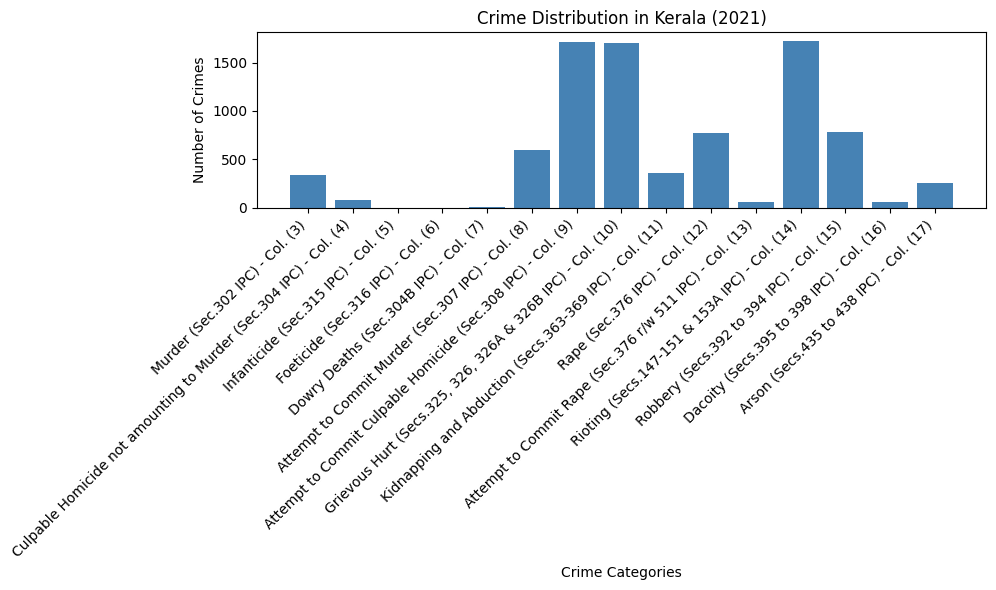

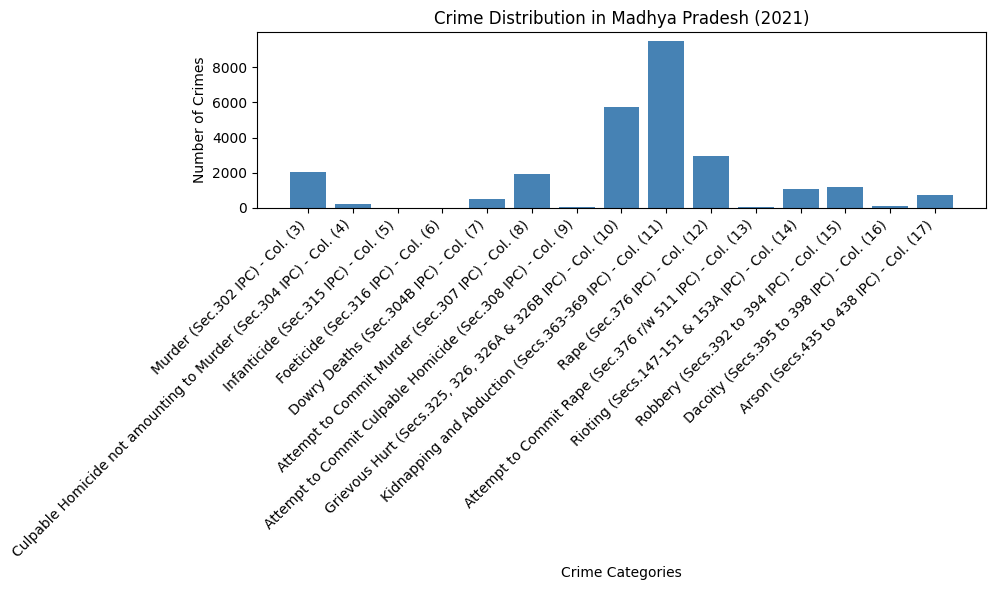

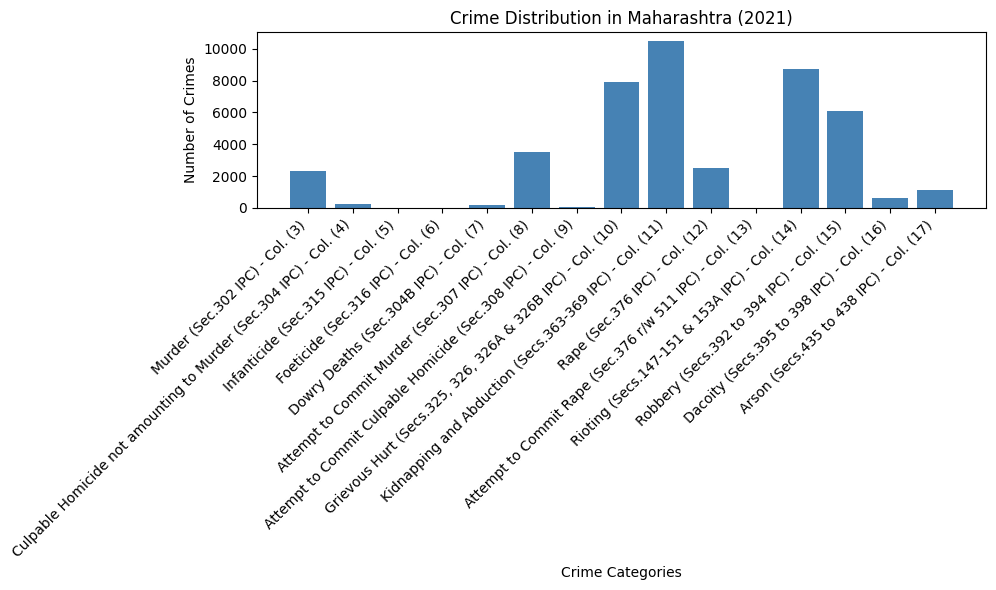

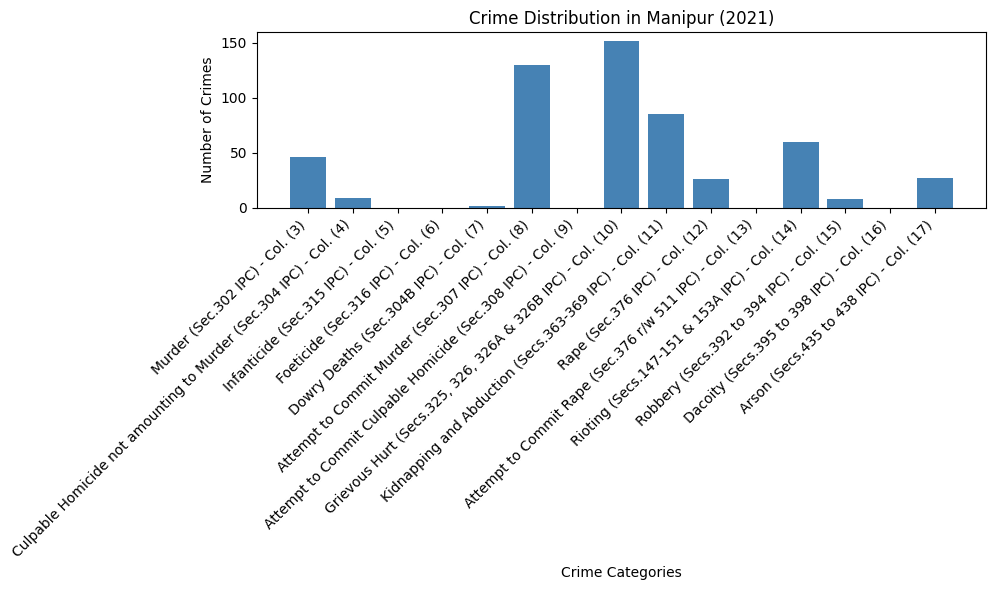

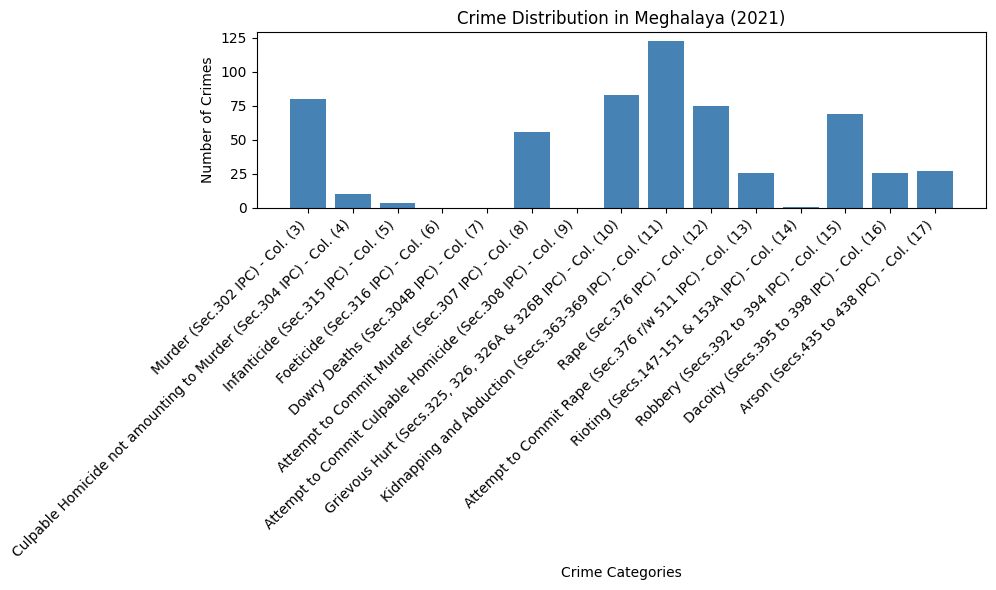

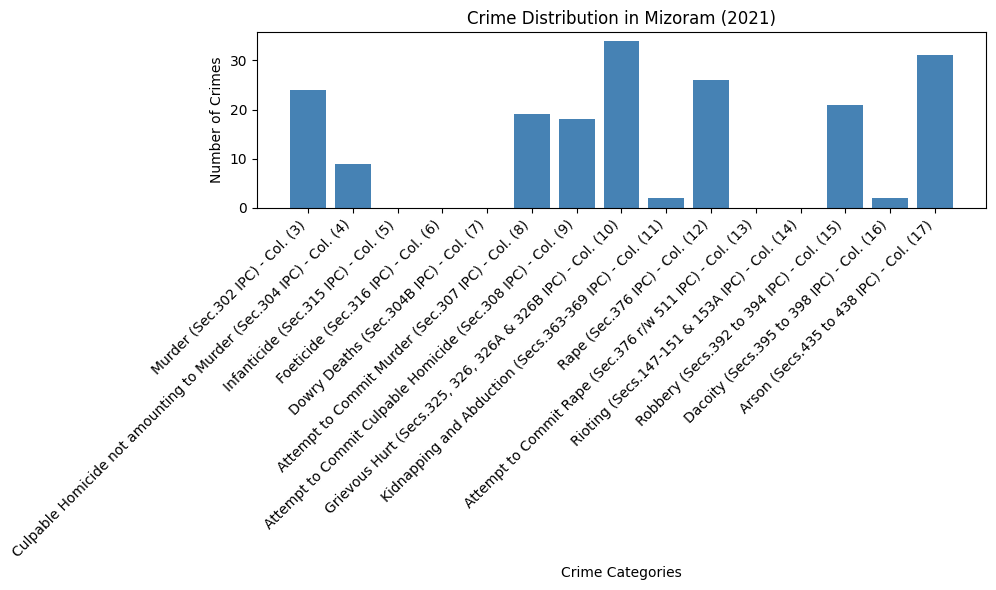

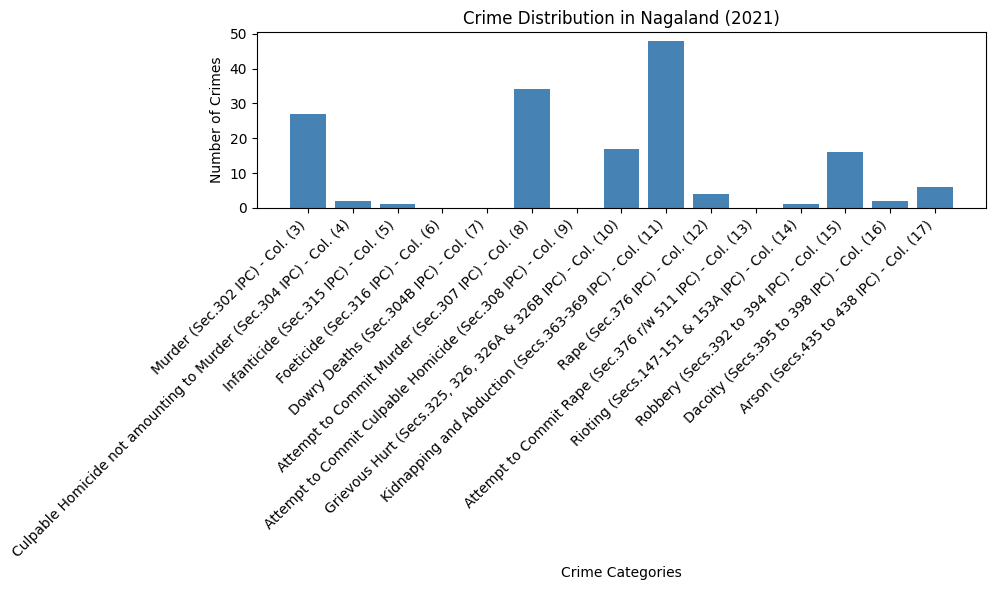

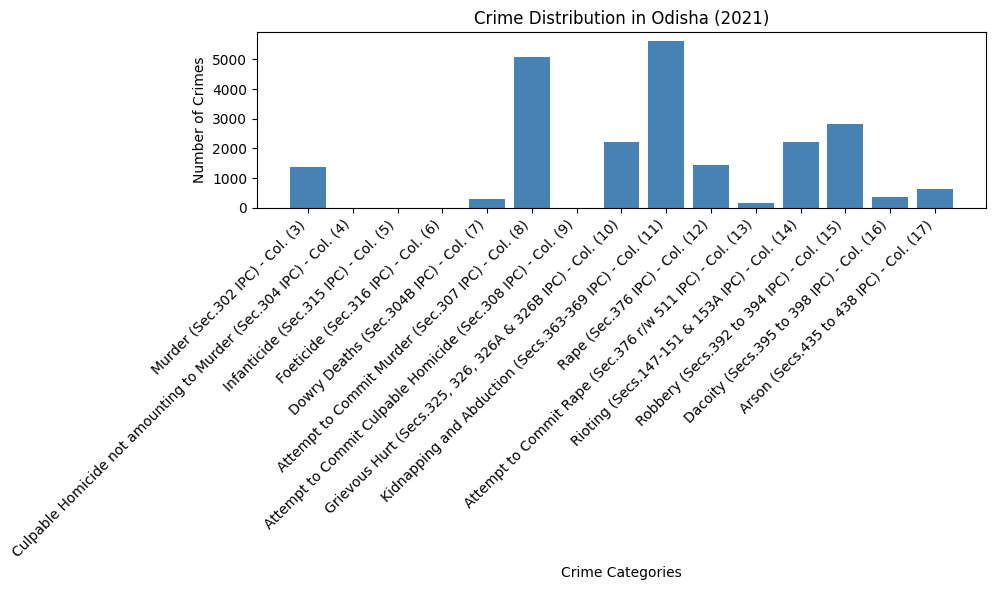

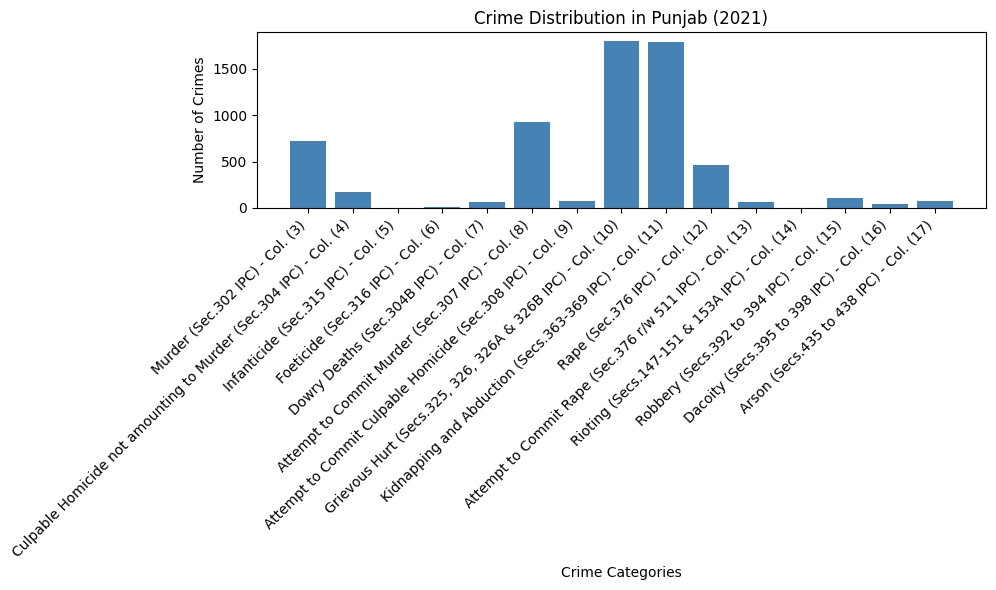

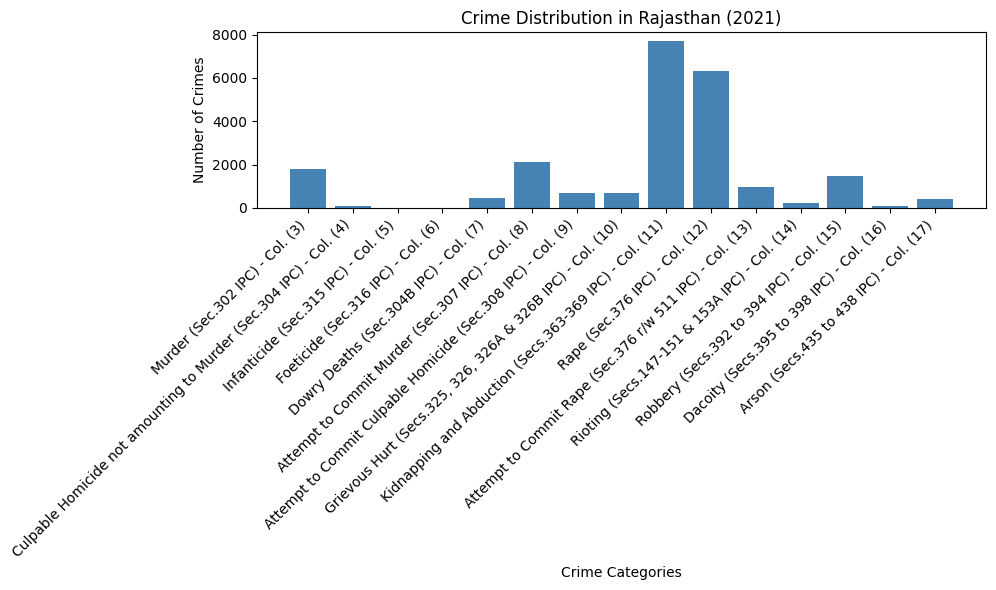

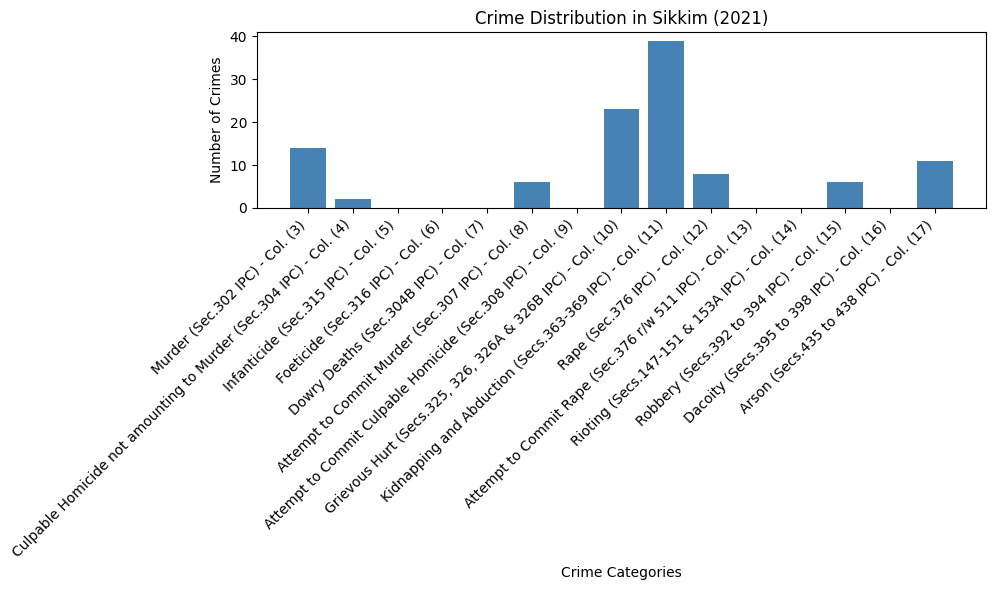

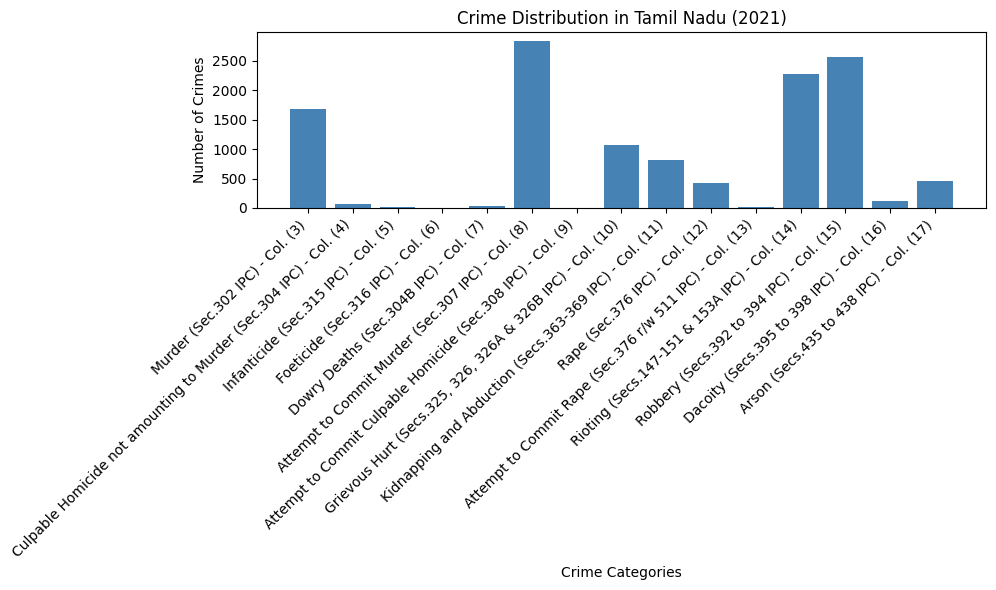

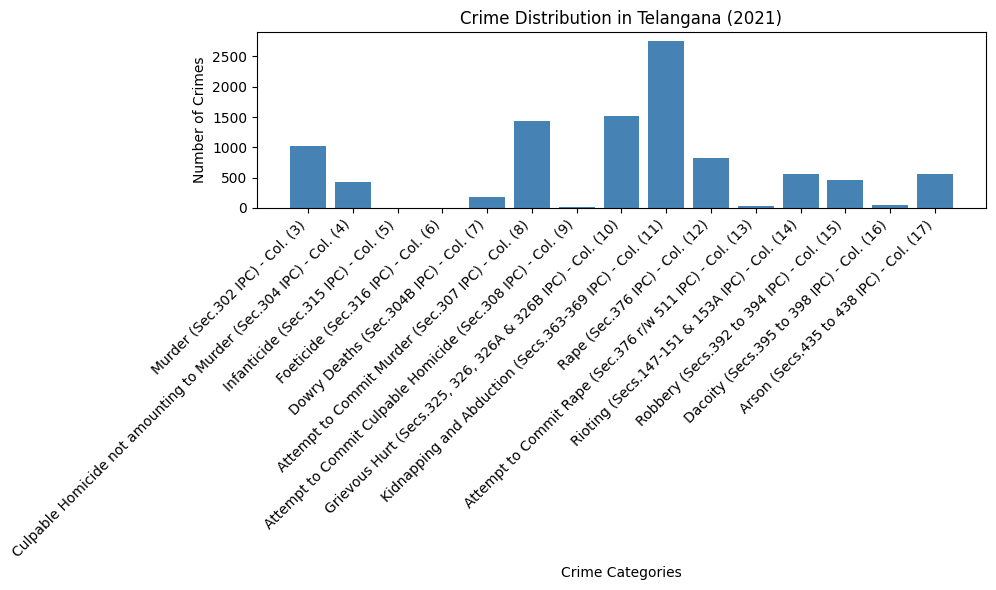

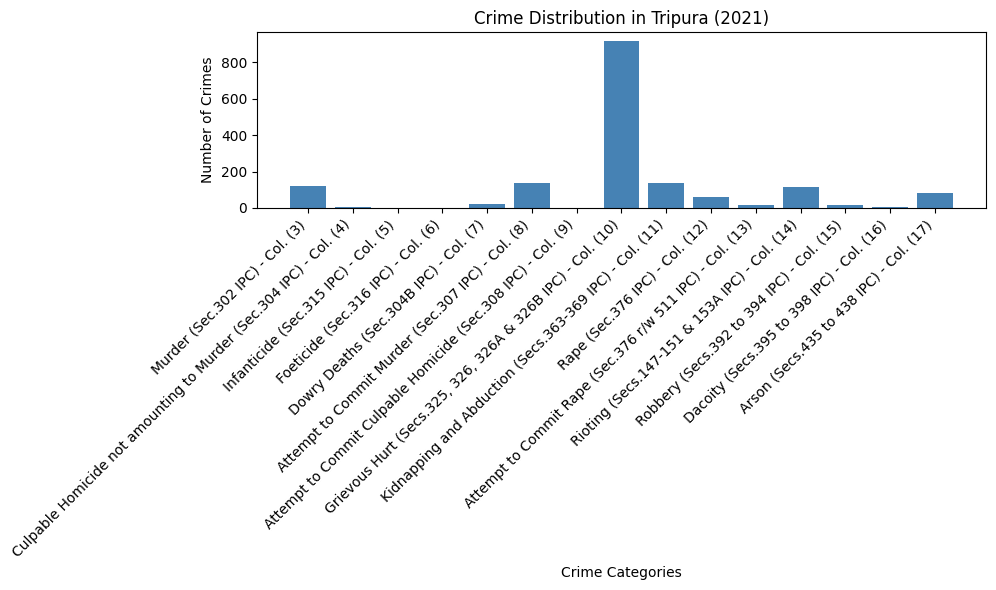

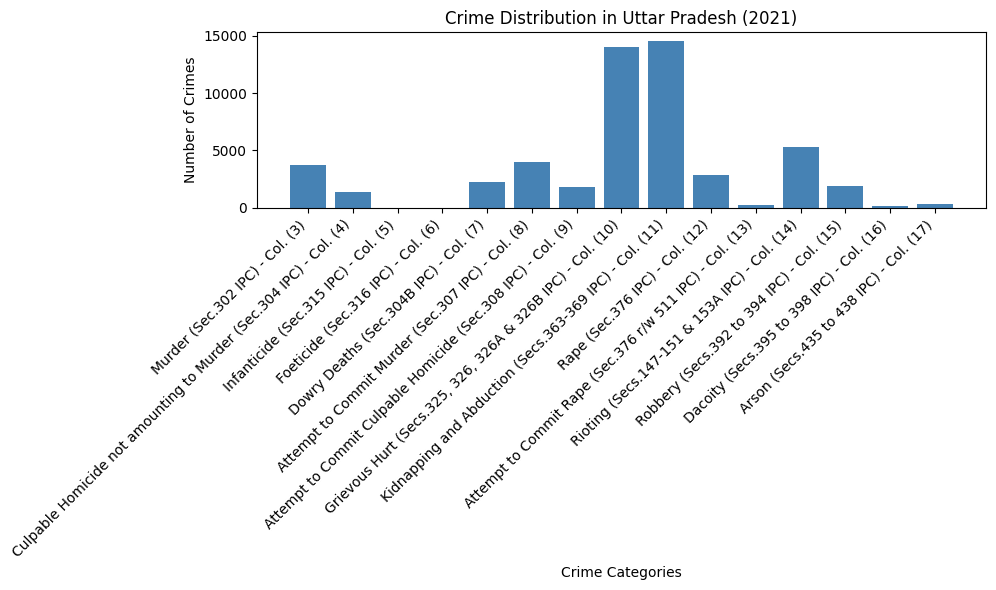

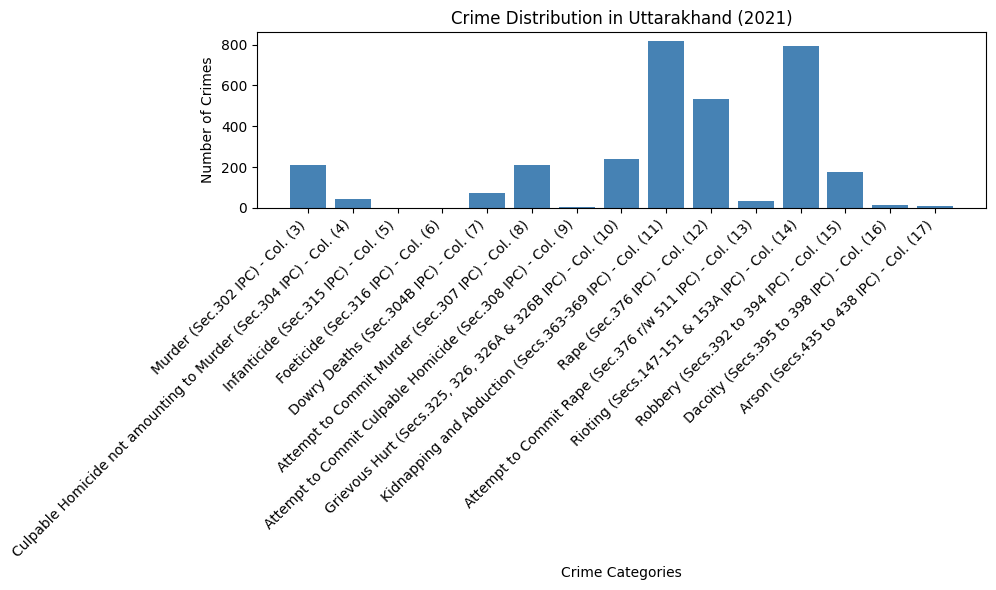

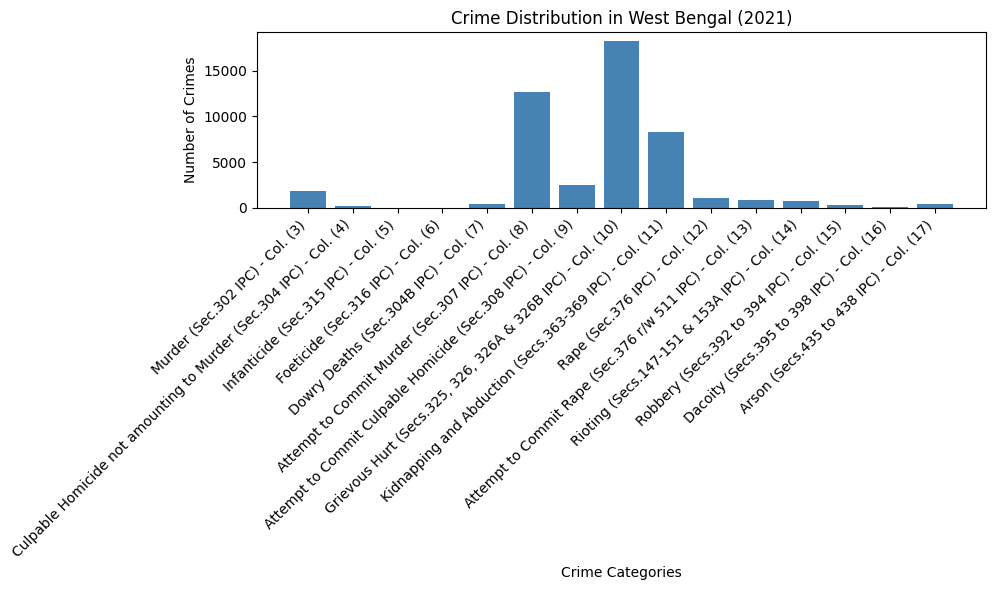

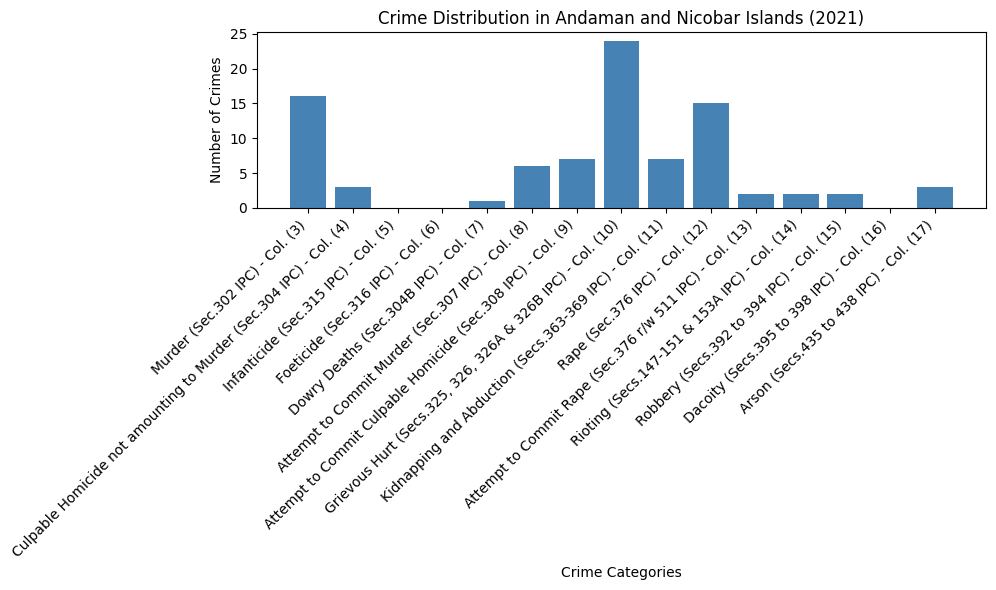

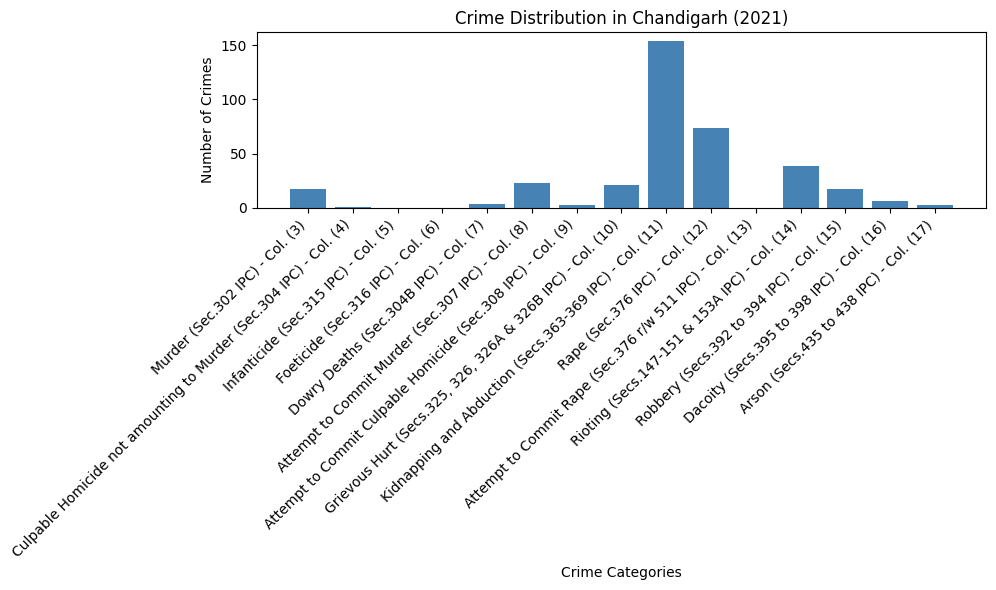

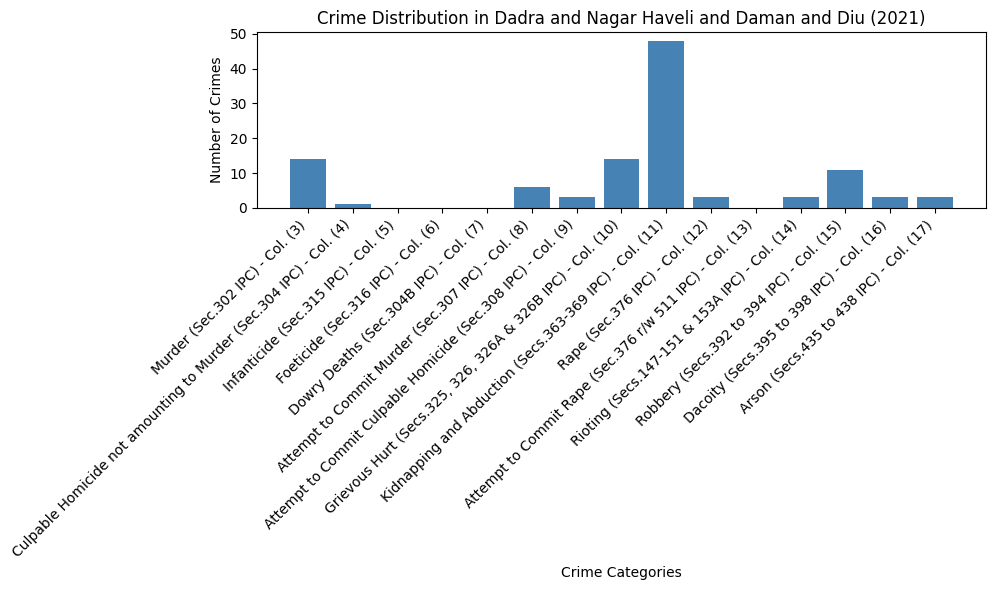

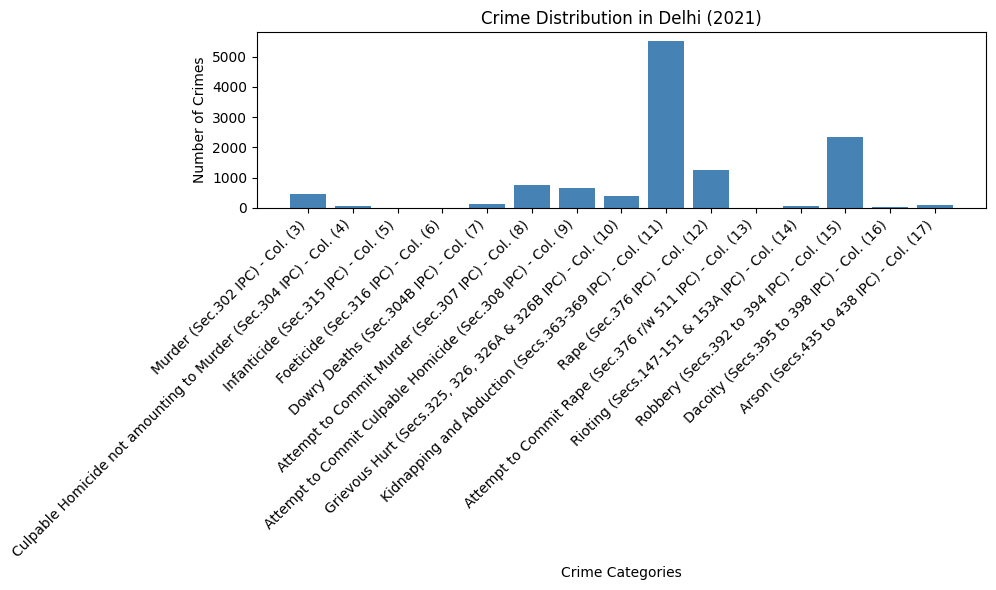

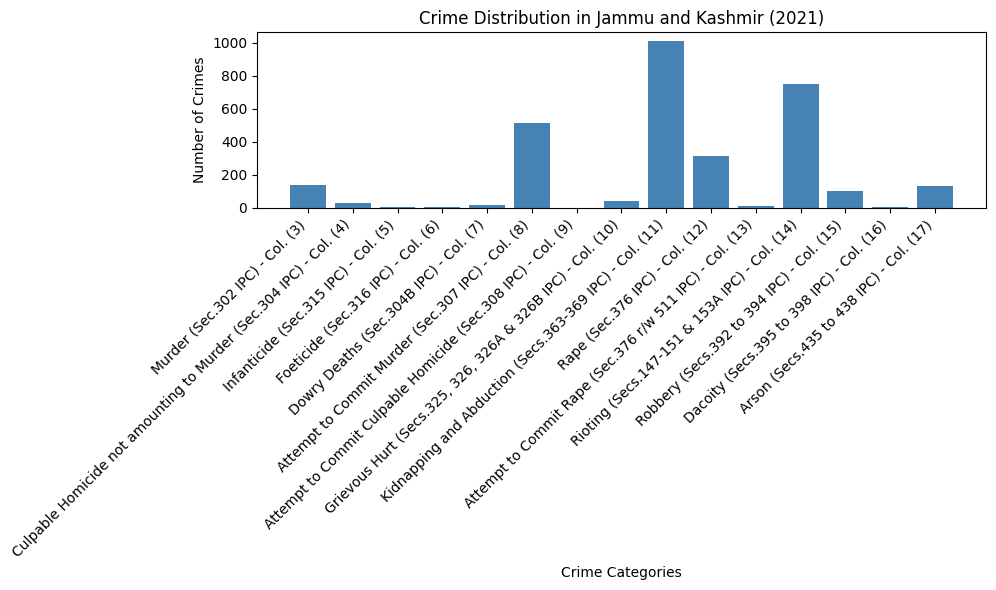

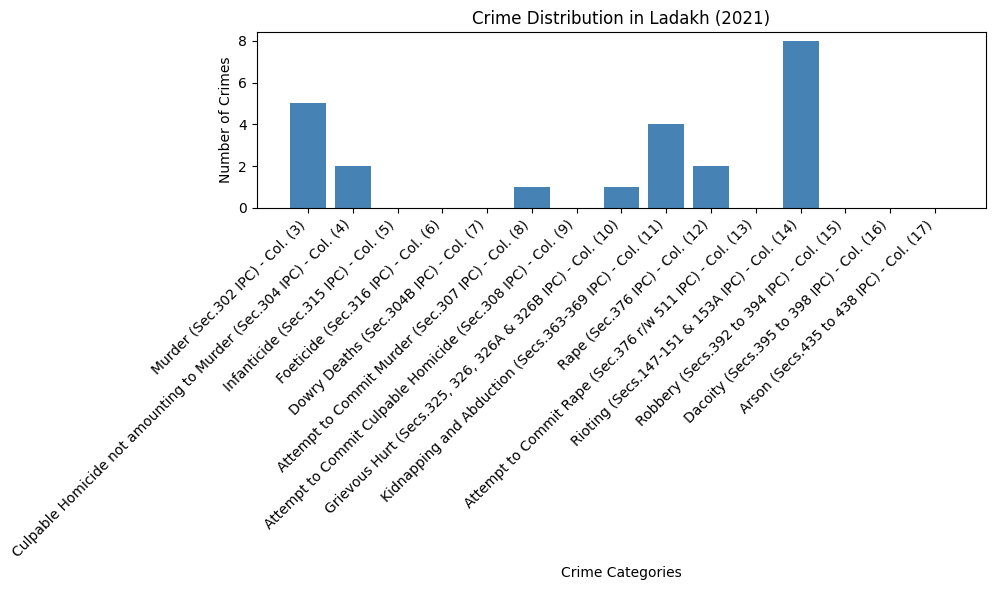

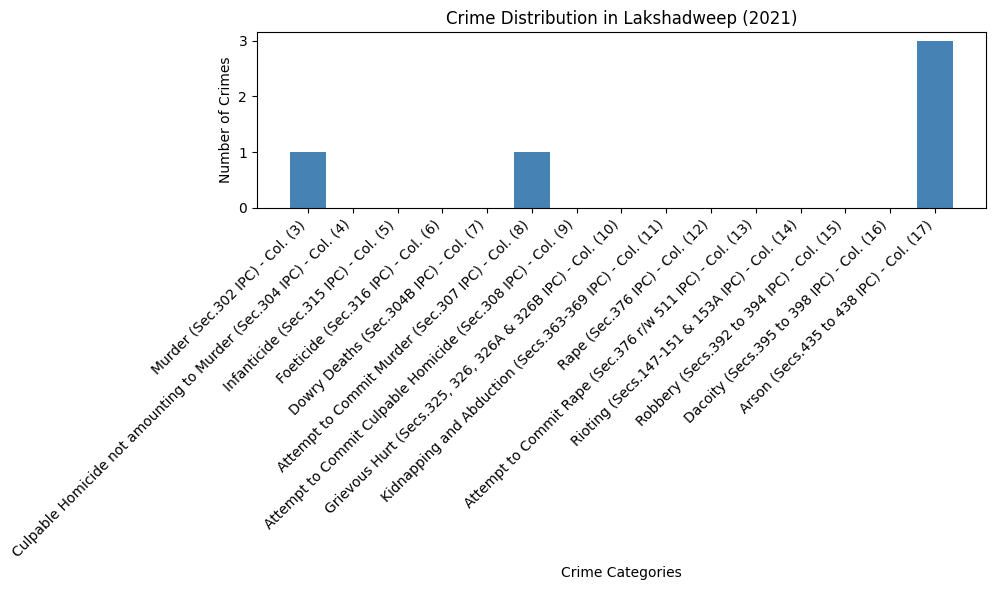

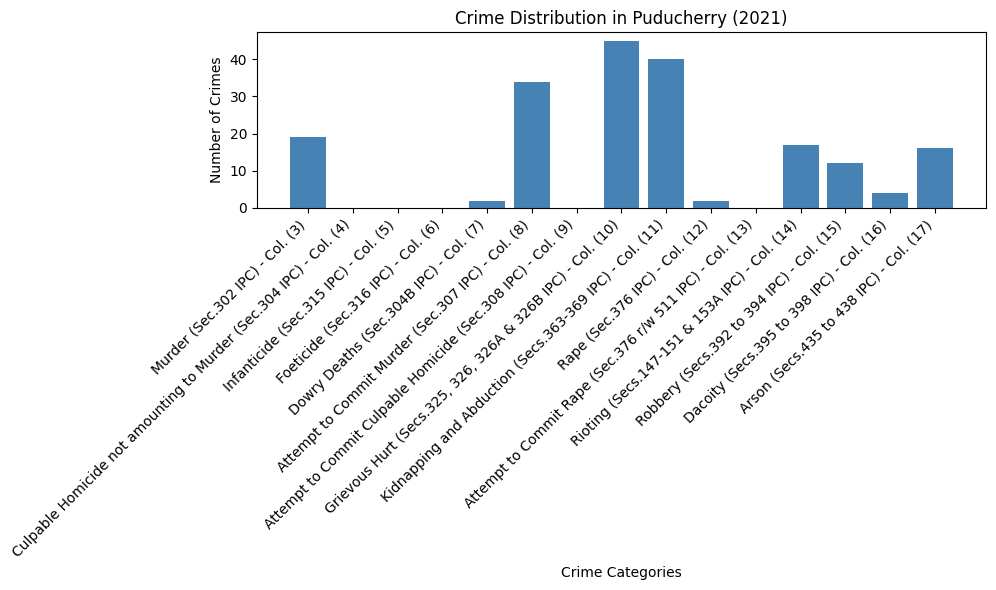

In [5]:


# Load the filtered dataset
data_filtered = pd.read_csv('NCRB_2021_filtered.csv')

# Remove unnecessary columns like Sl. No.
data_filtered = data_filtered.drop(columns=['Sl. No. Col. (1)'])

# Define broader categories for crimes, excluding the last 'Total' column
crime_categories = data_filtered.columns[1:-1]  # Adjust if necessary

# Loop through each state and create a bar plot
for state in data_filtered['State/UT Col. (2)']:
    # Filter data for the current state
    state_data = data_filtered[data_filtered['State/UT Col. (2)'] == state]

    # Plotting crime distribution for the current state
    plt.figure(figsize=(10, 6))
    plt.bar(crime_categories, state_data.iloc[0, 1:-1], color='steelblue')
    plt.xlabel('Crime Categories')
    plt.ylabel('Number of Crimes')
    plt.title(f'Crime Distribution in {state} (2021)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    # Save the plot as an image file
   # plt.savefig(f'crime_distribution_{state}.png')
    #plt.close()  # Close the figure to avoid display in notebook

    plt.show()
